# Load dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_dataset = '../../data/graduate-admissions/Admission_Predict.csv'
df_admission = pd.read_csv(path_dataset, index_col='Serial No.')
df_admission['biais'] = 1

In [3]:
df_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,biais
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,1
3,316,104,3,3.0,3.5,8.00,1,0.72,1
4,322,110,3,3.5,2.5,8.67,1,0.80,1
5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [4]:
df_admission.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'biais'],
      dtype='object')

In [7]:
x = df_admission['GRE Score'].values
X = df_admission[['biais', 'GRE Score']].values
y = df_admission['Chance of Admit '].values

# Plot data

In [8]:
import matplotlib.pyplot as plt


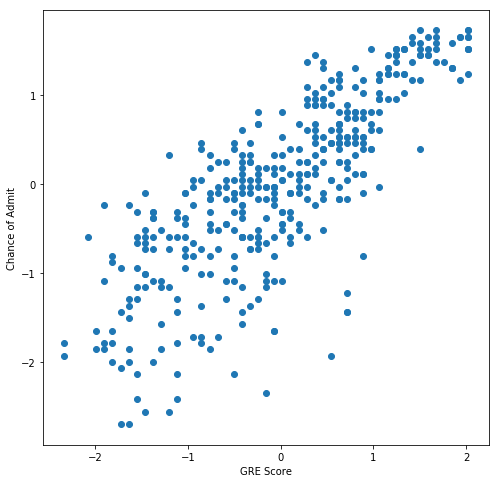

In [21]:
plt.figure(figsize=(8,8))

plt.scatter(x, y)

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.show()

# Estimateur des moindres carrés

In [26]:
def return_params(x, y):
    #n = len(y)
    #
    #s1 = 0.
    #s2 = 0.
    #for i in range(n):
    #    s1 += (x[i] - np.mean(x))*(y[i] - np.mean(y))
    #    s2 += np.power(x[i] - np.mean(x), 2)
    #theta_1 = s1/s2
    #theta_0 = np.mean(y) - theta_1*np.mean(x)
    
    theta_1 = np.sum((x - np.mean(x))*(y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    theta_0 = np.mean(y) - theta_1*np.mean(x)
    
    return theta_0, theta_1

theta_0, theta_1 = return_params(x, y)
print(theta_0, theta_1)

-2.462993358185704e-18 0.8026104595903505


In [27]:
y_pred = theta_0 + theta_1*x 


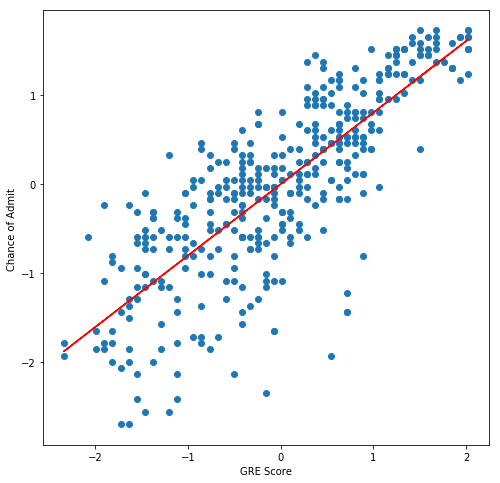

In [28]:
plt.figure(figsize=(8,8))

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')

plt.show()

# Calculer le coût

In [22]:
def get_cost(X, y, theta):
    m = len(y)
    y_pred = np.dot(X, theta)
    return 1/(2*m)*np.sum((y - y_pred)**2)

get_cost(X, y, [0, 0])

0.5000000000000001

In [23]:
t0 = np.linspace(-10, 10, num=100)
t1 = np.linspace(-10, 10, num=100)

cost = np.zeros((len(t0), len(t1)))

for i, theta_0 in enumerate(t0):
    for j, theta_1 in enumerate(t1):
        cost[i, j] = get_cost(X, y, [theta_0, theta_1])
        

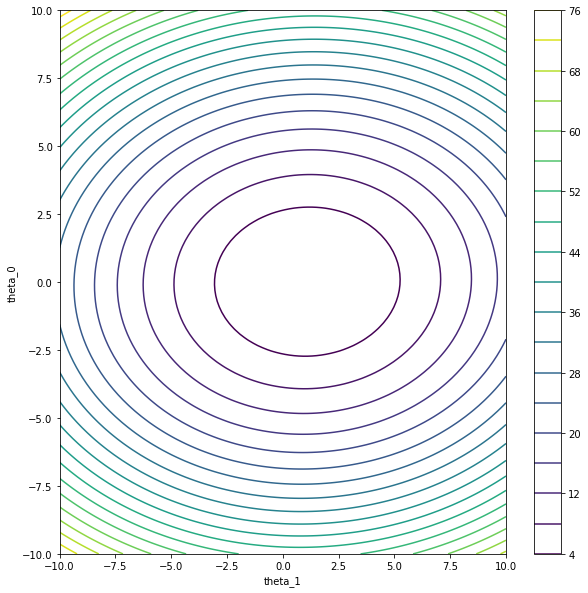

In [24]:
plt.figure(figsize=(10,10))

plt.contour(t1, t0, cost, 20)
plt.colorbar()

plt.xlabel('theta_1')
plt.ylabel('theta_0')

plt.show()

# Normalisation

In [25]:
def normalize(x):
    return (x - np.mean(x))/np.std(x)

X = df_admission[['biais', 'GRE Score']].values
for i in range(1, X.shape[1]):
    X[:,i] = normalize(X[:,i])

x = normalize(df_admission['GRE Score'].values)
y = normalize(df_admission['Chance of Admit '].values)



# Descente de gradient

In [ ]:
def update_theta(theta, alpha, X, y):
    pass

theta = update_theta([10,10], 0.5, X, y)


In [ ]:
n_iterations = 50
theta = np.array([9, 9])
alpha = 0.5

plt.figure(figsize=(10,10))
plt.contour(t1, t0, cost, 20)
plt.colorbar()

for i in range(n_iterations):
    theta_temp = update_theta(theta, alpha, X, y)
    plt.plot([theta[1], theta_temp[1]], [theta[0], theta_temp[0]], marker='o', color='r')
    theta = theta_temp

plt.xlabel('theta_1')
plt.ylabel('theta_0')

plt.show()